In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import scipy
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=120)

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [9]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Inputs

In [5]:
adata_path = '/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023_feature-select-0003.h5ad'

# methods to subset populations
key_of_groups = 'fine_grain_mod'
# groups = ['VentricularCardiomyocytesLeftCompact','VentricularCardiomyocytesLeftTrabeculated']

# Read in trajectory object

In [6]:
adata = sc.read_h5ad(adata_path)

# rename obs_names
adata.obs_names = [x.replace('_expression','').replace('_paired','') for x in adata.obs_names]

adata

AnnData object with n_obs × n_vars = 7674 × 142283
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'adata_peak_tfidf', 'dr

In [7]:
adata.obs[key_of_groups].value_counts()

MacrophagesLYVE1pos     4757
MacrophagesATF3pos       898
MacrophagesCX3CR1pos     804
Monocytes                496
MacrophagesYSderived     207
MonocytesMPOpos          202
MonocyteDerivedCells     199
MacrophagesTIMD4pos      111
Name: fine_grain_mod, dtype: int64

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


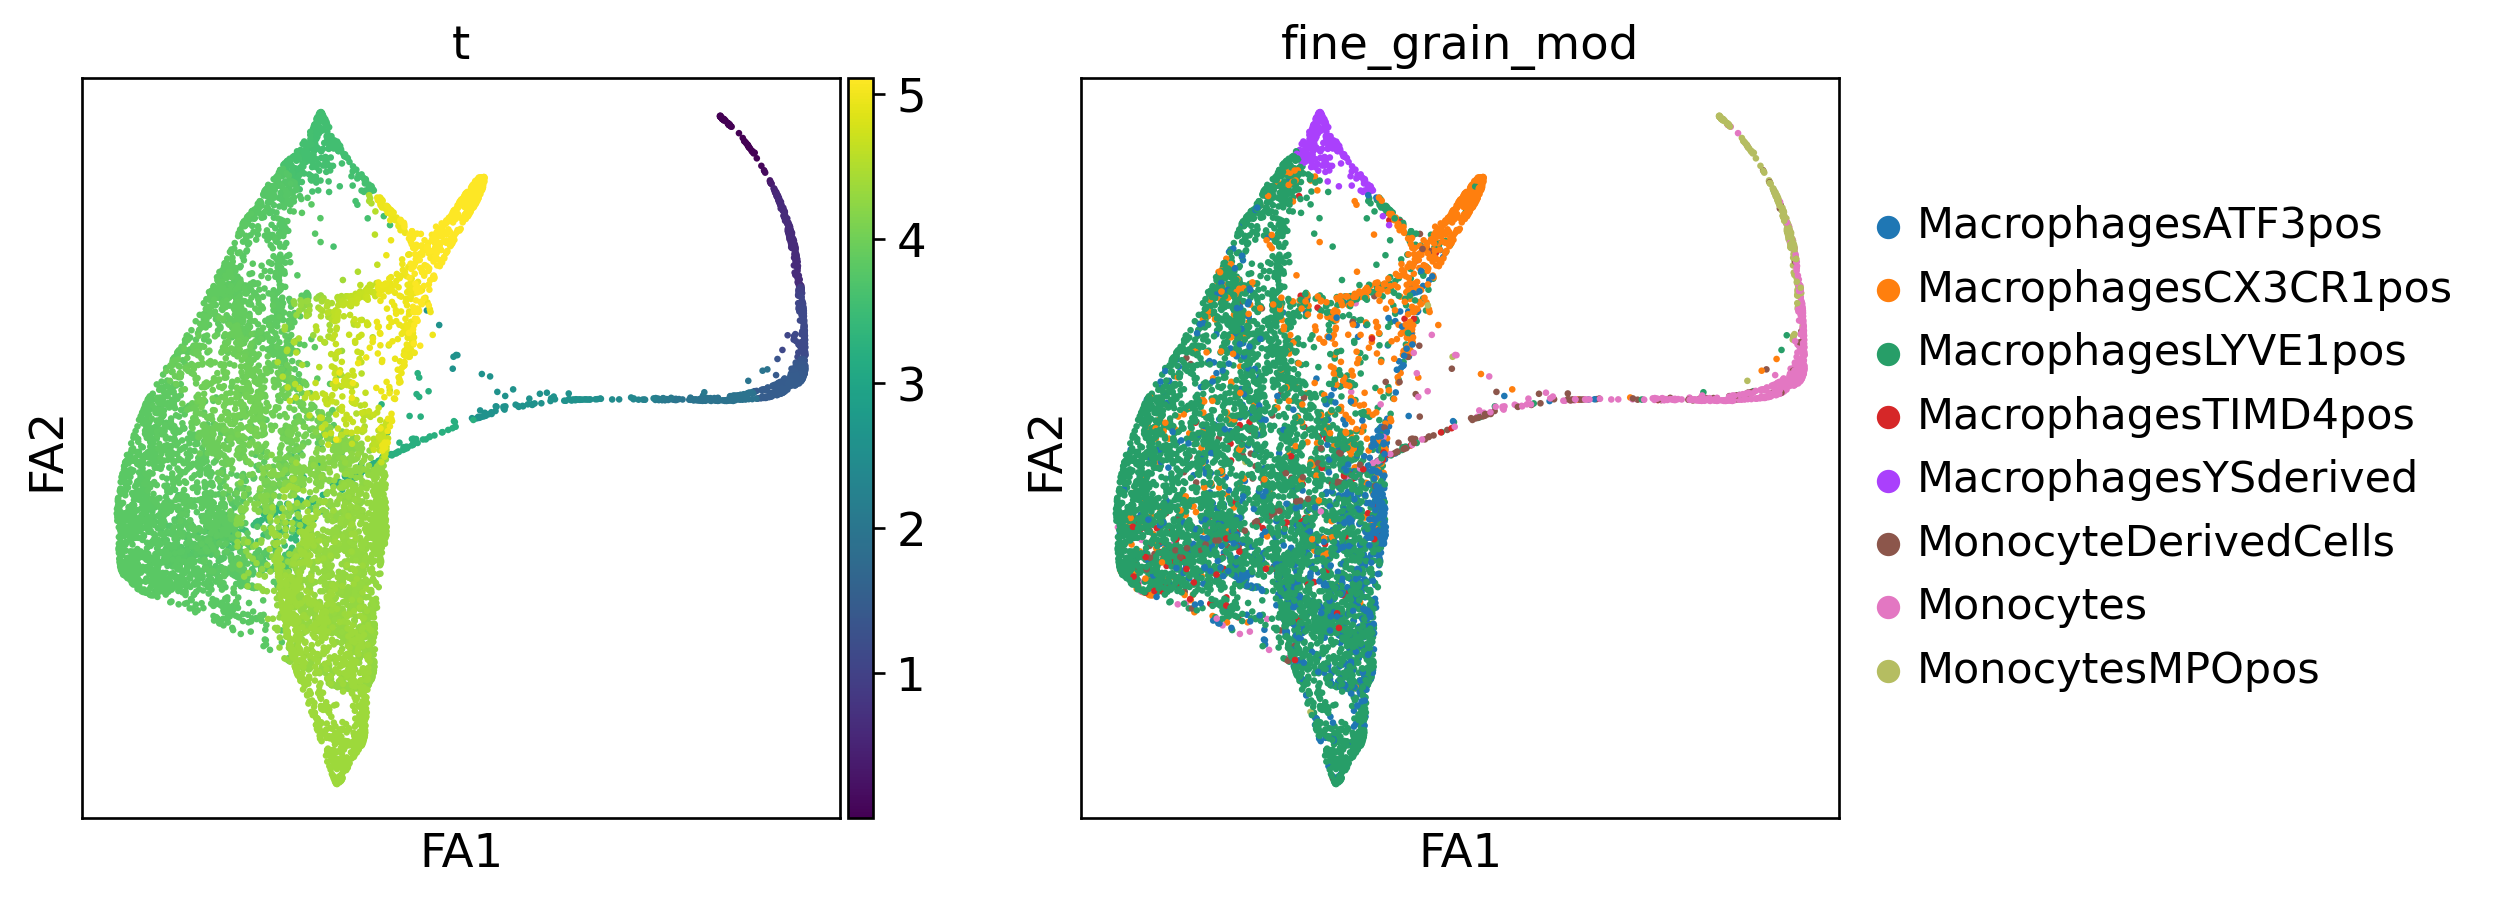

In [8]:
sc.pl.draw_graph(adata,color=['t',key_of_groups],color_map="viridis", wspace=0.2)

In [9]:
set(adata.obs['seg'])

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

# Show trajectories

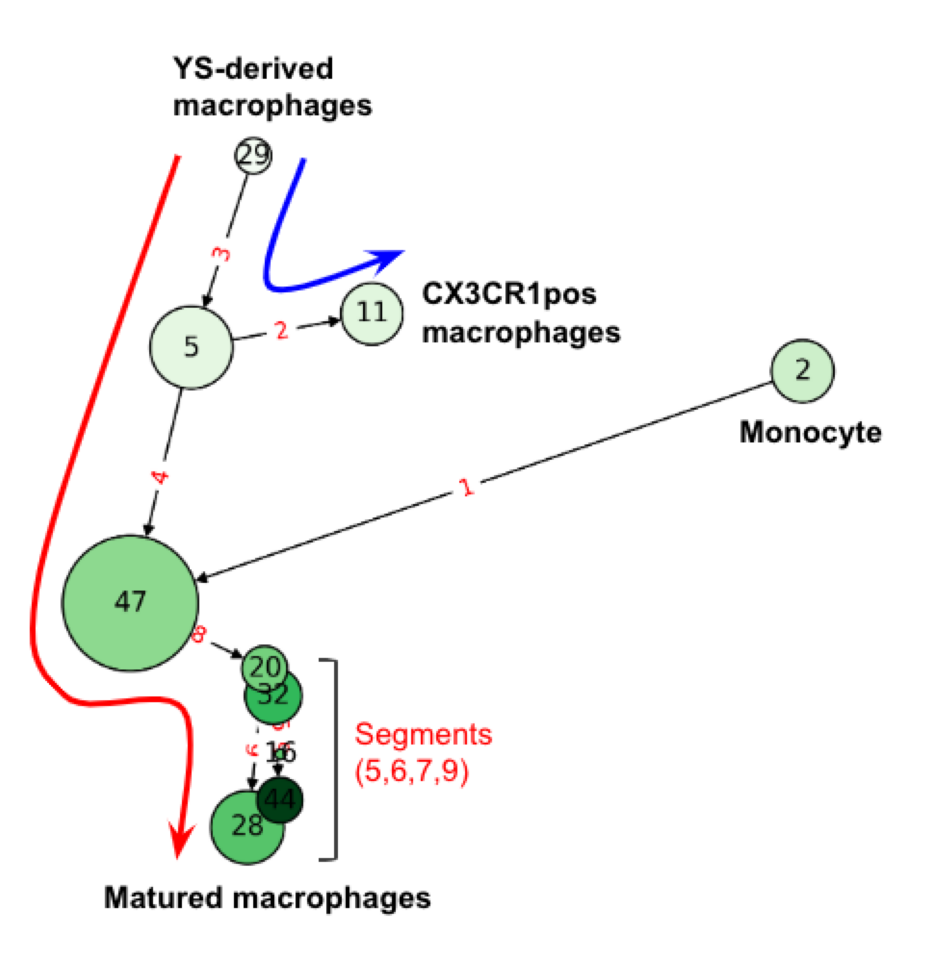

In [13]:
from PIL import Image
image = Image.open('./MoMP_trajectory.png')

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.grid(False)
plt.show()

# Subset populations

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


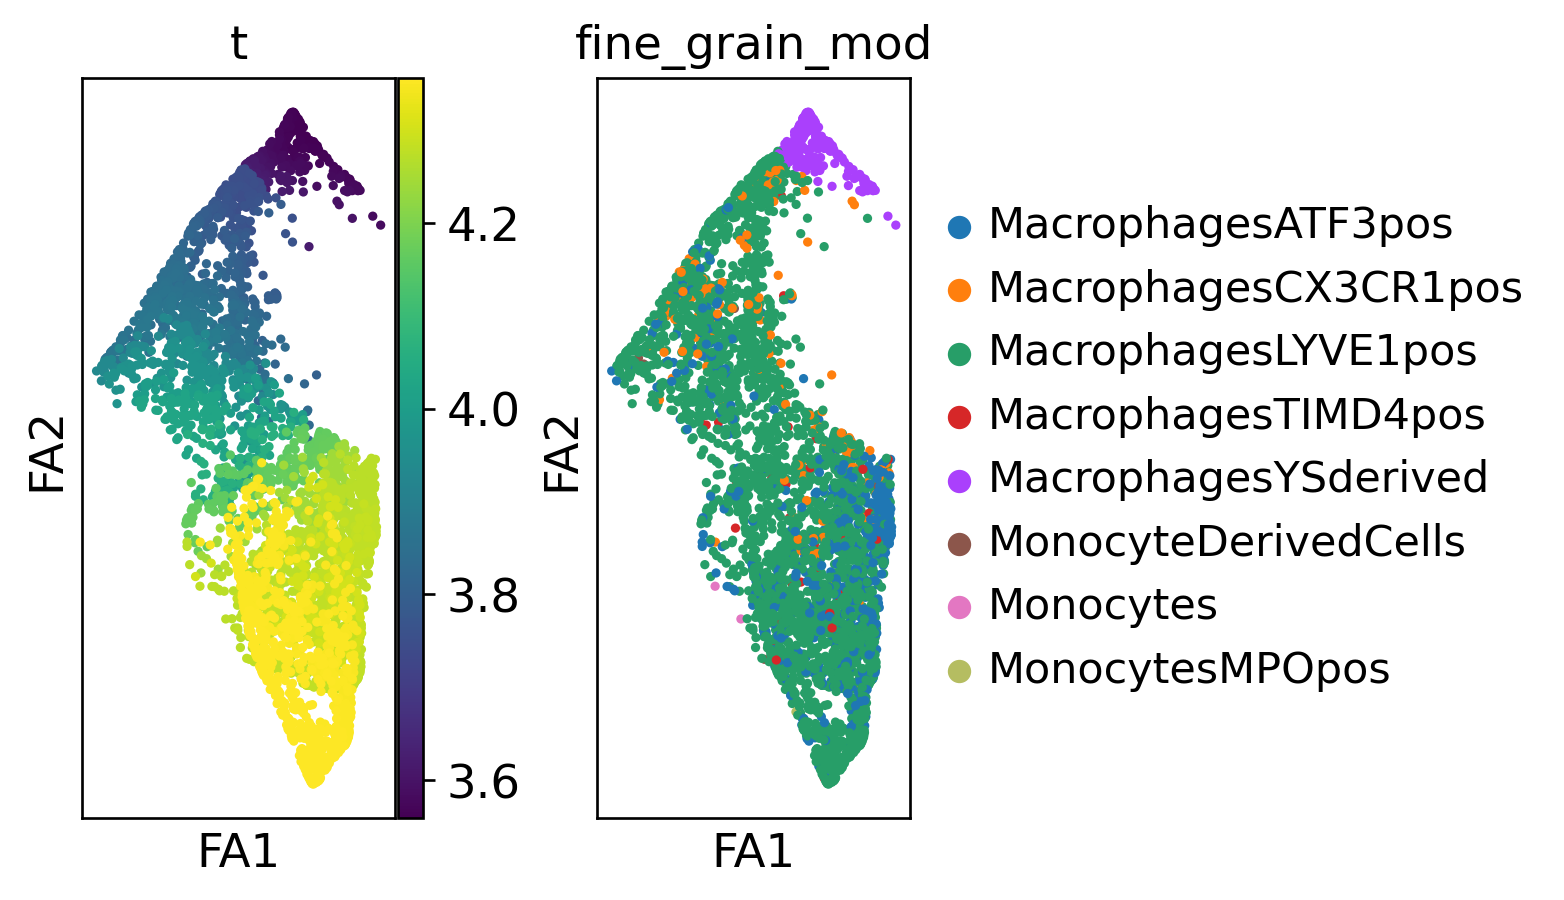

In [11]:
plt.rcParams['figure.figsize'] = 1.5,4
segments_to_select = ['3', '4', '5', '6', '7', '8', '9']
adata = adata[adata.obs['seg'].isin(segments_to_select)]
sc.pl.draw_graph(adata,color=['t',key_of_groups],color_map="viridis", wspace=0.5)

/tmp/ipykernel_203412/3235555261.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['t_scaled'] = (adata.obs['t']-adata.obs['t'].min())/(adata.obs['t'].max()-adata.obs['t'].min())


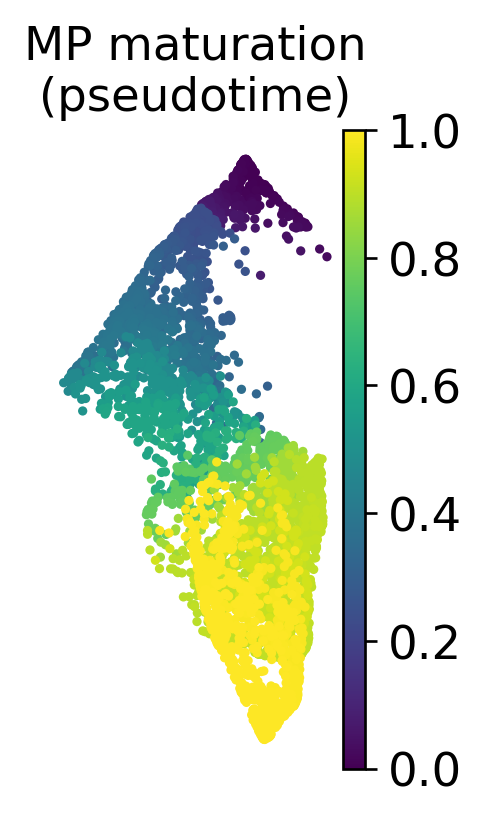

In [12]:
# scale t
# min-max scaling
adata.obs['t_scaled'] = (adata.obs['t']-adata.obs['t'].min())/(adata.obs['t'].max()-adata.obs['t'].min())

plt.rcParams['figure.figsize'] = 1.7,3.5
sc.pl.draw_graph(adata,color=['t_scaled'],color_map="viridis",frameon=False,
                 title='MP maturation\n(pseudotime)', show=False
                )
plt.savefig(f"{figdir}/Force-directed-graph_MP_pseudotime.pdf", bbox_inches="tight",dpi=300)

In [17]:
adata.obs['week']

BHF_F_Hea11933667_BHF_F_Hea11596620_TCATGCCTCGTTATCT-1    13W
BHF_F_Hea11933667_BHF_F_Hea11596620_TCTAATCTCCTCACTA-1    13W
7089STDY13216927_BHF_F_Hea13242534_GTTTCTAGTCCTAGTT-1     12W
BHF_F_Hea11933671_BHF_F_Hea11596624_GCTAGCCAGCACTTGG-1     5W
BHF_F_Hea11933668_BHF_F_Hea11596621_GTTTCTAGTTAGCTGA-1    13W
                                                         ... 
BHF_F_Hea11192328_AAGGTTCTCAGAGGTG-1                       8W
BHF_F_Hea11192328_AAGACCTCACACGCTG-1                       8W
BHF_F_Hea11192328_CATATGGCAGCTCGCA-1                       8W
BHF_F_Hea11192328_CAACCAACACGCGAAA-1                       8W
BHF_F_Hea11192328_GGATGTTGTGTTTGTG-1                       8W
Name: week, Length: 3886, dtype: category
Categories (7, object): ['5W', '7W', '8W', '9W', '10W', '12W', '13W']

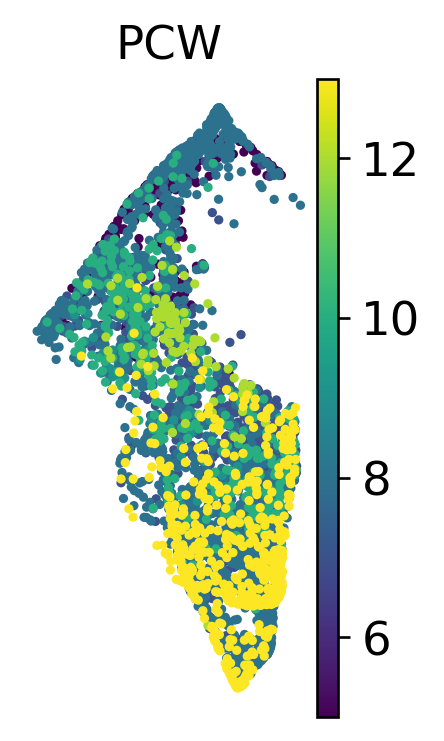

In [18]:
# convert to continuous week
adata.obs['week_int'] = [int(x.replace('W','')) for x in adata.obs['week']]

plt.rcParams['figure.figsize'] = 1.7,3.5
sc.pl.draw_graph(adata,color=['week_int'],color_map="viridis",frameon=False,
                 title='PCW', show=False
                )
plt.savefig(f"{figdir}/Force-directed-graph_MP_PCW.pdf", bbox_inches="tight",dpi=300)

# Extract gene features and log-normalise

In [23]:
# extract gene features
adata_gex = adata.copy()
gene_vars = adata_gex.var_names[adata_gex.var['modality']=='Gene Expression']
adata_gex = adata_gex[:,gene_vars]

# log normalise 
print(adata_gex.X.data[:10])
sc.pp.normalize_total(adata_gex, target_sum=1e4)
sc.pp.log1p(adata_gex)
print(adata_gex.X.data[:10])

# store to .uns
adata.uns['adata_gex_lognorm']=adata_gex.copy()
adata.uns['adata_gex_lognorm']

[1. 7. 1. 4. 1. 4. 1. 1. 9. 5.]


/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[1.0841573 2.6877544 1.0841573 2.1779046 1.0841573 2.1779046 1.0841573
 1.0841573 2.9238348 2.3781319]


/tmp/ipykernel_150291/1223271433.py:13: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['adata_gex_lognorm']=adata_gex.copy()


AnnData object with n_obs × n_vars = 3886 × 15922
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'adata_peak_tfidf', 'dra

# Add normalised peak counts

In [24]:
adata_peak = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/PeakMatrix/Foetal_Peaks_tfidf.h5ad')

shared_cell_ids = list(set(adata.obs_names).intersection(adata_peak.obs_names))

# subset cells and regions
adata.uns['adata_peak_tfidf']=adata_peak[shared_cell_ids,adata.var_names[adata.var['modality']=='Peaks']]
adata_peak = adata.uns['adata_peak_tfidf'].copy()
adata_peak

AnnData object with n_obs × n_vars = 1162 × 126361
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [25]:
# add milestones and segments
columns_to_add = ['t', 'seg', 'edge', 't_sd', 'milestones']
adata.uns['adata_peak_tfidf'].obs[columns_to_add] = adata.obs.loc[adata.uns['adata_peak_tfidf'].obs_names, columns_to_add]
adata_peak = adata.uns['adata_peak_tfidf'].copy()
adata_peak

/tmp/ipykernel_150291/281467255.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.uns['adata_peak_tfidf'].obs[columns_to_add] = adata.obs.loc[adata.uns['adata_peak_tfidf'].obs_names, columns_to_add]


AnnData object with n_obs × n_vars = 1162 × 126361
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

# Read in scenicplus output and create anndata

In [26]:
# read in regulon score
auc_gene = pd.read_csv('/nfs/team205/heart/pyscenic/plus/AUCscore/MoMP_eRegulon_AUC_gene.csv',index_col=0)
print(auc_gene.shape)
auc_region = pd.read_csv('/nfs/team205/heart/pyscenic/plus/AUCscore/MoMP_eRegulon_AUC_region.csv',index_col=0)
print(auc_region.shape)

# select shared barcodes (ie only multiome data, only monocyte/macrophage)
shared_cell_ids = list(set(auc_gene.index).intersection(auc_region.index).intersection(adata.obs_names))
print(len(shared_cell_ids))

(1899, 280)
(1899, 280)
1162


In [27]:
# gene
# select cells in anndata (monocyte and macrophage)
auc_gene = auc_gene.loc[shared_cell_ids]

# create anndata
adata_aucg = anndata.AnnData(
    X=auc_gene,
    obs=adata[shared_cell_ids].obs,
    var=pd.DataFrame(auc_gene.columns).set_index(0),
    obsm=adata[shared_cell_ids].obsm
    # obsp=adata.obsp.copy(),
    # uns=adata.uns.copy(),
)
# modify varnames
adata_aucg.var_names = [x.split('_(')[0] for x in adata_aucg.var_names]

# store to .uns
adata.uns['adata_auc_gene']=adata_aucg.copy()
adata.uns['adata_auc_gene']

AnnData object with n_obs × n_vars = 1162 × 280
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    obsm: 'MultiVI_latent', 'X_R', 'X_draw_graph_fa', 'X_palantir', 'X_umap', 'X_umap13', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'

In [28]:
# region
# select cells in anndata (monocyte and macrophage)
auc_region = auc_region.loc[shared_cell_ids]

# create anndata
adata_aucr = anndata.AnnData(
    X=auc_region,
    obs=adata[shared_cell_ids].obs,
    var=pd.DataFrame(auc_region.columns).set_index(0),
    obsm=adata[shared_cell_ids].obsm
    # obsp=adata.obsp.copy(),
    # uns=adata.uns.copy(),
)
# modify varnames
adata_aucr.var_names = [x.split('_(')[0] for x in adata_aucr.var_names]

# store to .uns
adata.uns['adata_auc_region']=adata_aucr.copy()
adata.uns['adata_auc_region']

AnnData object with n_obs × n_vars = 1162 × 280
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    obsm: 'MultiVI_latent', 'X_R', 'X_draw_graph_fa', 'X_palantir', 'X_umap', 'X_umap13', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'

# Differential test

In [31]:
root_milestone = '29'

In [32]:
# prepare a dictionary to put result
diff_dict = {}
diff_dict['auc_gene']=np.nan
diff_dict['auc_region']=np.nan
diff_dict['gene']=np.nan
diff_dict['region']=np.nan
diff_dict

{'auc_gene': nan, 'auc_region': nan, 'gene': nan, 'region': nan}

In [33]:
# Differential test
# genes
sc.tl.rank_genes_groups(adata_gex,groupby='milestones',reference=root_milestone,method='t-test')
## Get result and store in .uns
DE_df=sc.get.rank_genes_groups_df(adata_gex, group=None)
diff_dict['gene']=DE_df.copy()

# regions
sc.tl.rank_genes_groups(adata_peak,groupby='milestones',reference=root_milestone,method='t-test')
## Get result and store in .uns
DE_df=sc.get.rank_genes_groups_df(adata_peak, group=None)
diff_dict['region']=DE_df.copy()

# auc-gene
sc.tl.rank_genes_groups(adata_aucg,groupby='milestones',reference=root_milestone,method='t-test')
## Get result and store in .uns
DE_df=sc.get.rank_genes_groups_df(adata_aucg, group=None)
diff_dict['auc_gene']=DE_df.copy()

# auc-region
sc.tl.rank_genes_groups(adata_aucr,groupby='milestones',reference=root_milestone,method='t-test')
## Get result and store in .uns
DE_df=sc.get.rank_genes_groups_df(adata_aucr, group=None)
diff_dict['auc_region']=DE_df.copy()

In [34]:
diff_dict['auc_gene']

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,16,ATF3_+,77.103035,2.608205,4.112004e-20,1.151361e-17
1,16,CUX1_+,36.757832,2.701651,1.325035e-07,5.300141e-06
2,16,MEF2C_-,31.324810,2.210737,6.812433e-06,1.589568e-04
3,16,SMAD3_+,23.935774,1.414512,2.571626e-12,2.400184e-10
4,16,BHLHE40_+,21.822508,2.409877,3.380624e-04,4.302612e-03
...,...,...,...,...,...,...
1955,5,TCF12_+,-6.700207,-0.307108,3.079433e-09,3.592672e-08
1956,5,FLI1_+,-6.706899,-0.283681,2.697694e-09,3.284149e-08
1957,5,RXRA_-,-7.568123,-0.360849,2.733738e-11,4.784041e-10
1958,5,ZNF148_+,-8.417570,-0.613074,1.902916e-12,5.477273e-11


In [35]:
diff_dict['auc_region']

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,16,ETS2_-,17.407267,0.793715,7.580610e-07,0.000027
1,16,IKZF1_-,14.298243,1.074643,1.132241e-03,0.018649
2,16,JDP2_-,8.313459,1.847336,8.404102e-03,0.090506
3,16,IRF3_+,7.035042,0.229250,7.719514e-03,0.086459
4,16,FOXK2_+,6.771698,1.422885,1.621377e-02,0.137571
...,...,...,...,...,...,...
1955,5,MEF2C_+,-5.101223,-0.251481,1.189031e-06,0.000016
1956,5,EGR1_-,-5.346797,-0.349323,4.495988e-07,0.000007
1957,5,MXI1_-,-5.367793,-0.064130,1.580775e-07,0.000003
1958,5,ZNF100_+,-5.381326,-0.262160,2.857967e-07,0.000005


In [36]:
diff_dict['region']

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,16,chr10:95757868_95758368,25.172016,7.335178,2.596510e-30,3.280976e-25
1,16,chr7:30594611_30595111,23.703228,4.665804,2.735055e-28,1.728021e-23
2,16,chr1:235128651_235129151,17.693869,3.714906,4.373113e-23,1.841970e-18
3,16,chr4:113762452_113762952,17.324625,3.857943,7.200762e-23,2.274739e-18
4,16,chrX:18674762_18675262,16.918501,4.475505,1.486972e-22,3.757905e-18
...,...,...,...,...,...,...
884522,5,chr4:48340987_48341487,-3.762090,-1.342591,3.645647e-04,9.354566e-02
884523,5,chr1:156728534_156729034,-3.806968,-1.953304,3.366173e-04,9.050063e-02
884524,5,chr22:29882896_29883396,-3.936510,-2.030115,2.256706e-04,7.855637e-02
884525,5,chr12:52005709_52006209,-4.288823,-3.284569,7.453088e-05,5.507483e-02


# Save anndata

In [41]:
segments_to_select.sort()
outdir = f'/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023/seg_{"-".join(segments_to_select)}'
outdir

'/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023/seg_3-4-5-6-7-8-9'

In [44]:
# save anndata
if os.path.exists(outdir):
    print('directory already exists')
else:
    os.makedirs(outdir)
adata.write(f'{outdir}/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 3886 × 142283
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'adata_peak_tfidf', 'dr

# Fitting

In [ ]:
# read in anndata
adata = sc.read_h5ad(f'{outdir}/adata.h5ad')
adata

In [46]:
import scFates as scf

In [47]:
# prepare a dictionary to put result
fit_dict = {}
fit_dict['auc_gene']=np.nan
fit_dict['auc_region']=np.nan
fit_dict['gene']=np.nan
fit_dict['region']=np.nan
fit_dict

{'auc_gene': nan, 'auc_region': nan, 'gene': nan, 'region': nan}

## Regulon - auc gene

In [48]:
%%time
# fit
scf.tl.test_association(adata.uns['adata_auc_gene'],n_jobs=20)

# extract results and store to the dictionary
df = adata.uns['adata_auc_gene'].var.copy()
df['activator_repressor'] = [x.split('_')[-1] for x in df.index]
df = df.sort_values('A',ascending=False)
fit_dict['auc_gene'] = df.copy()

test features for association with the trajectory
    single mapping :   0%|          | 0/280 [00:00<?, ?it/s]

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.


    single mapping :   1%|          | 3/280 [01:01<1:34:08, 20.39s/it]

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.


    single mapping :   2%|▎         | 7/280 [02:18<1:30:18, 19.85s/it]

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero e

    single mapping :  69%|██████▉   | 194/280 [06:17<02:47,  1.94s/it] 

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.


    single mapping : 100%|██████████| 280/280 [06:45<00:00,  1.45s/it]
    found 0 significant features (0:06:45) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
CPU times: user 1.89 s, sys: 2.75 s, total: 4.63 s
Wall time: 6min 45s


## Regulon - auc region

In [49]:
%%time
# fit
scf.tl.test_association(adata.uns['adata_auc_region'],n_jobs=20)

# extract results and store to the dictionary
df = adata.uns['adata_auc_region'].var.copy()
df['activator_repressor'] = [x.split('_')[-1] for x in df.index]
df = df.sort_values('A',ascending=False)
fit_dict['auc_region'] = df.copy()

test features for association with the trajectory
    single mapping : 100%|██████████| 280/280 [01:41<00:00,  2.76it/s]
    found 0 significant features (0:01:41) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
CPU times: user 1.87 s, sys: 620 ms, total: 2.49 s
Wall time: 1min 41s


## Gene

In [50]:
%%time
# fit
scf.tl.test_association(adata.uns['adata_gex_lognorm'],n_jobs=20)

# extract results and store to the dictionary
df = adata.uns['adata_gex_lognorm'].var.copy()
df = df.sort_values('A',ascending=False)
fit_dict['gene'] = df.copy()

test features for association with the trajectory
    single mapping : 100%|██████████| 15922/15922 [1:56:39<00:00,  2.27it/s]
    found 1045 significant features (1:56:39) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
CPU times: user 1min 31s, sys: 28.4 s, total: 2min
Wall time: 1h 56min 45s


## Region

In [55]:
%%time
# fit
scf.tl.test_association(adata.uns['adata_peak_tfidf'],n_jobs=20)

# extract results and store to the dictionary
df = adata.uns['adata_peak_tfidf'].var.copy()
df = df.sort_values('A',ascending=False)
fit_dict['region'] = df.copy()

test features for association with the trajectory
    single mapping :   0%|          | 0/126361 [00:00<?, ?it/s]

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.


    single mapping :   0%|          | 3/126361 [00:48<571:45:08, 16.29s/it] 

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero e

    single mapping :   0%|          | 127/126361 [03:54<64:45:58,  1.85s/it]

Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/software/isg/private/R-4.1.2/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero e

    single mapping : 100%|██████████| 126361/126361 [5:08:20<00:00,  6.83it/s]  
    found 700 significant features (5:08:20) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
CPU times: user 6min 36s, sys: 1min 2s, total: 7min 38s
Wall time: 5h 8min 33s


## Save result of differential and fitting result 

In [53]:
utils.save_pkl(diff_dict, 
         file=f'{outdir}/differential-test_result.pkl')

In [56]:
utils.save_pkl(fit_dict, 
         file=f'{outdir}/fitting_result.pkl')